## Here 100 uL of AuSS + 20uL AuNR both with DNA2 were taken in a microcuvette having 100uL H2O + 25uL of 2M NaCl. The laser power was 2.5A.

For kinetics, each spectrum was taken in 2 second intervals. 

In [1]:
import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta
from natsort import natsorted

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import normalize_max

%matplotlib inline

In [2]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2024-04-12-100ns-20nr-blablabla_2-5a-notempcont-redip-kinet', '')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')
RESULT_DIR_PATH_CSV = os.path.join(BASE_DIR_PATH, 'results', 'csv', '')
RESULT_DIR_PATH_SI = os.path.join(BASE_DIR_PATH, 'results', 'figs', 'si_figs', 'png', '')

DATA_UV_DIR_PATH

'E:\\4_archives\\Pr003_self_oscillations\\data\\UV-Vis-NIR\\2024-04-12-100ns-20nr-blablabla_2-5a-notempcont-redip-kinet\\'

43


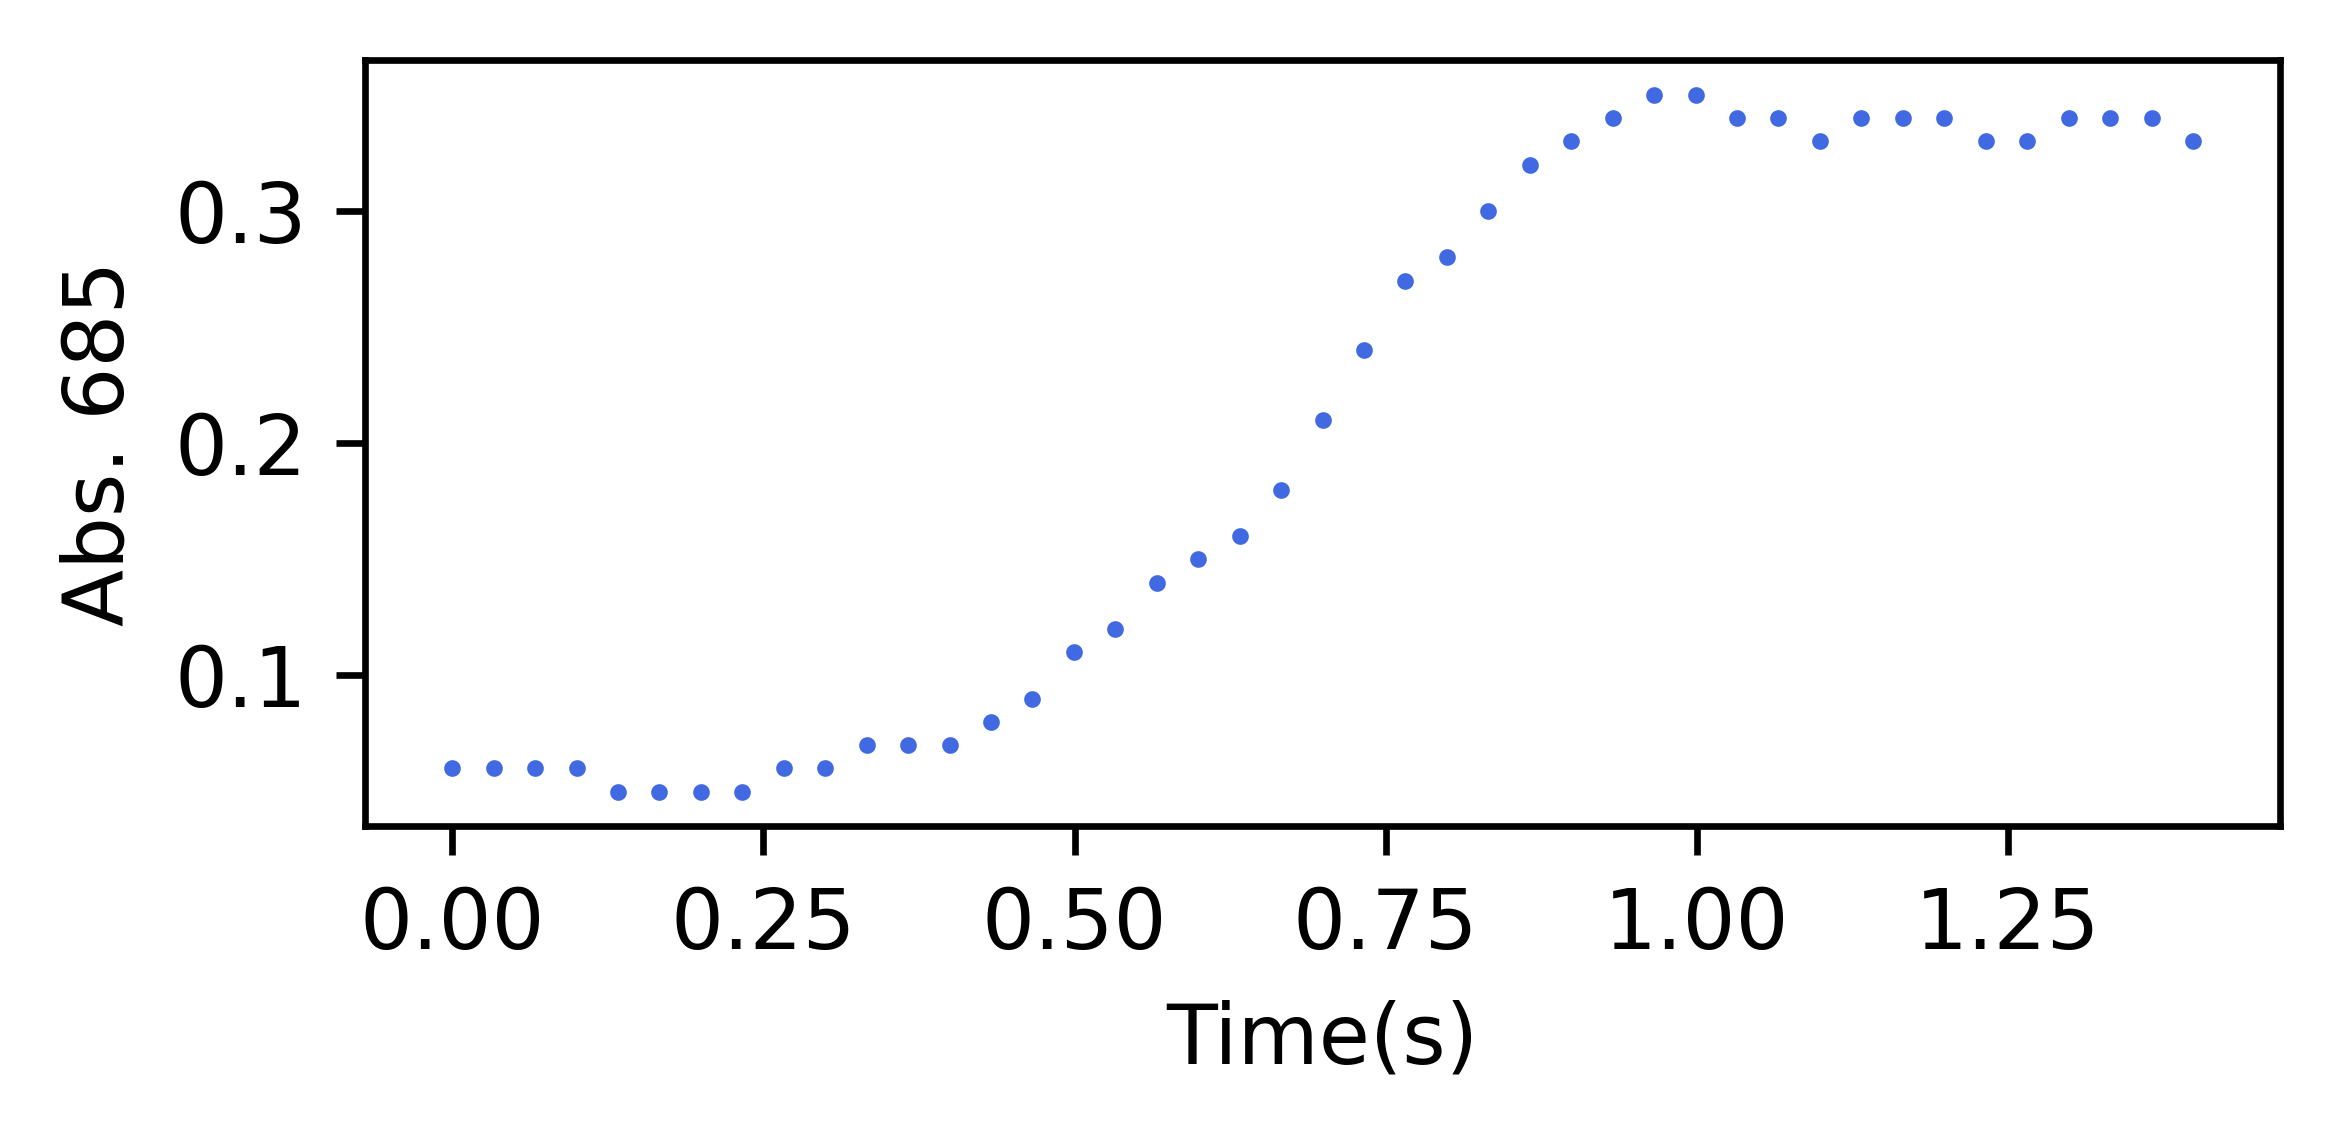

In [5]:
'''
Import cooling data from UV-Vis-NIR folder
'''

#================ import data =========================#

# Define the path to the folder containing the CSV files
folder_path = DATA_UV_DIR_PATH

# Get a list of all CSV files in the folder
txt_files = glob.glob(os.path.join(folder_path, '*.txt'))

print(len(txt_files))

#================ plot data heating cycle ===========================#

# fig = plt.figure(figsize=(4,2), dpi=300) # generate a figure
# ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

# Initialize the maximum value and its corresponding index
max_values_cool = []
max_indexes_cool = []
wv_abs_cool = []
times_cool = []

time_cool = 0

for i, txt_file in enumerate(natsorted(txt_files)):
    # Read the CSV file into a Pandas DataFrame
    df_cool = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    new_df_cool = df_cool.iloc[400:1200, ] #385 to 743 nm
    
    # Find the maximum value and its corresponding index
    max_value_cool = new_df_cool.iloc[668,1] # 685 nm
    max_values_cool.append(max_value_cool)
    
    times_cool.append(time_cool)
    time_cool = time_cool + 0.0333 # 2 seconds in minutes
    
    # set the color

    if i == 0:
        color = 'firebrick'
    elif i == len(txt_files)-1:
        color = 'royalblue'
    else:
        color = 'grey'
    
    # Plot the data
#     ax.plot(df_cool[0],df_cool[1], color = color, linewidth = 1)                           # plot data

# ax.set_xlim([350,800])                    # set wavelength limit
# ax.set_ylim([-0.1,0.8])                       # set absorbance limit
# ax.set_xlabel(r'Wavelength (nm)')          # set axis label
# ax.set_ylabel(r'Extinction ')              # set axis label
# ax.axvline(685, color='firebrick')

# plt.tight_layout()  


# Plot of max. wavelength with time

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax.scatter(times_cool, max_values_cool, s = 1, color = 'royalblue')                           # plot data
#ax.set_title('17$^{o}$C-3.3A-35mins-Wavelength')

#ax.set_xlim([3300,4000])                   
#ax.set_ylim([0.3,0.51])                       
ax.set_xlabel(r'Time(s)')          # set axis label
ax.set_ylabel(r'Abs. 685')              # set axis label

plt.tight_layout()  


a = 0.28562510018705717
b = 0.0569795986129288
c = 10.679005177623704
d = 0.6714162220453175


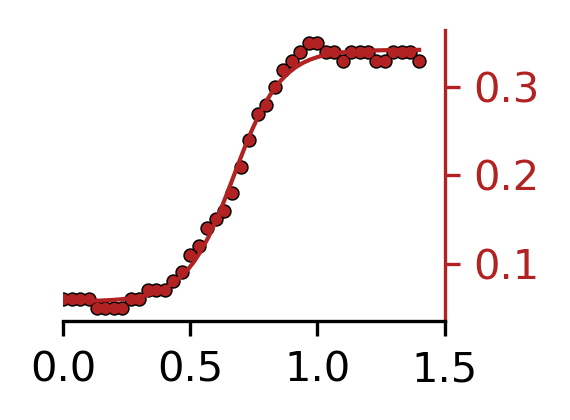

In [7]:
#========logiscic_growth===============#

# Define the logiscic_growth function
def logiscic_growth(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

# Fit the data to the exponential decay function
popt, pcov = curve_fit(logiscic_growth, times_cool, max_values_cool)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
print('d =', popt[3])
x_data = np.linspace(0,1.4)

fig_kin = plt.figure(figsize=(2,1.5), dpi=300) # generate a figure
ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_kin.plot(x_data, logiscic_growth(x_data, popt[0], popt[1], popt[2], popt[3]), color='firebrick', linewidth = 1)
ax_kin.scatter(times_cool, max_values_cool, color='black', s=6)                           # plot data
ax_kin.scatter(times_cool, max_values_cool, color='firebrick', s=3)                           # plot data

#ax_kin.set_xlim([0,30])                    # set wavelength limit

ax_kin.set_xlim([0,1.5])                       # set absorbance limit
#ax_kin.set_xlabel(r'Time (min)')          # set axis label
#ax_kin.set_ylabel(r'Ext. at 685nm')              # set axis label
ax_kin.spines['top'].set_visible(False)
ax_kin.spines['left'].set_visible(False)
ax_kin.spines['right'].set_color('firebrick')
ax_kin.tick_params(axis='y', colors='firebrick')
ax_kin.yaxis.set_label_position("right")
ax_kin.yaxis.tick_right()

#ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))
plt.tight_layout()

plt.savefig(RESULT_DIR_PATH + 'Fig_2c_inset.png', transparent = True)